In [142]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [143]:
#cargamos la librería
boston=load_boston()
print(boston.DESCR)
#Utilizando el RM: número médio de habitaciones vamos a predecir el valor medio de la casa

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

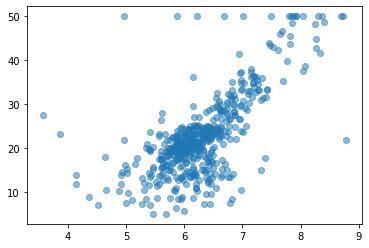

In [144]:

x=np.array(boston.data[:,5])
    #Matriz de entrada
        #Tomamos todas las filas de la columna 5, que corresponde al RM
Y=np.array(boston.target)
    #Valores de las casas en miles de dolares

#GRaficar

plt.scatter(x,Y,alpha=0.5)
plt.show()

### Formula obtenida de minimizar el error cuadrático médio

$\beta = (X^{T}X)^{-1}X^{T}Y$

Esta es la derivada del error cuadrático medio en su forma vectorial.
Lo que hemos hecho es coger nuestra función de coste (error) y la hemos minimizado


In [145]:
#Añadimos columna de unos para los términos independientes

print(f'np.size(x):            {np.size(x)}\nnp.size(np.ones(506)): {np.size(np.ones(506))}')
X=np.array([np.ones(506),x]).T
print(f'X.shape               {X.shape}')

np.size(x):            506
np.size(np.ones(506)): 506
X.shape               (506, 2)


In [146]:
B=np.linalg.inv(X.T @ X) @ X.T @ Y
# @ indica multiplicación matricial, es lo mismo que np.matmul

In [147]:
print(f'X:   {X.shape}\nX.T: {X.T.shape}\nY:   {np.size(Y)}\nB:   {np.size(B)}\n')
print(B)

X:   (506, 2)
X.T: (2, 506)
Y:   506
B:   2

[-34.67062078   9.10210898]


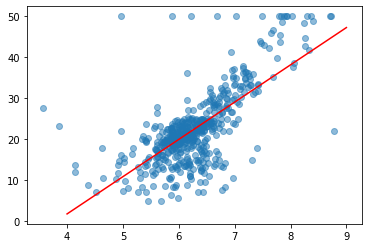

In [148]:
plt.scatter(x,Y,alpha=0.5)
plt.plot([4,9],[B[0]+B[1]*4,B[0]+B[1]*9],c='red')
plt.show()

### Implementado sklearn
---

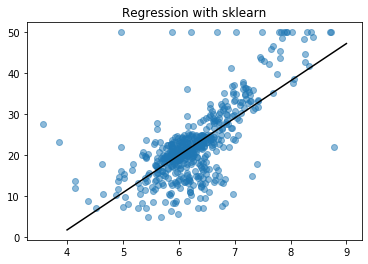

In [149]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,Y)
b=regressor.intercept_
m=regressor.coef_[1] 
plt.scatter(x,Y,alpha=0.5)
plt.plot([4,9],[b+m*4,b+m*9],c='black')
plt.title('Regression with sklearn')
plt.show()

### Otro dataset implementando completamente sklearn
---


In [150]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [151]:
dataset=pd.read_csv('summaryWeather.csv',low_memory=False)
dataset.head(5)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [152]:
dataset.shape

(119040, 31)

(119040,)
(119040, 1)


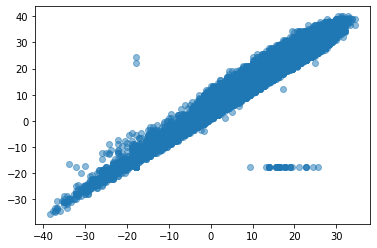

In [157]:
x=dataset.iloc[:,5].values
y=dataset.iloc[:,6].values
x=x.reshape(len(x),1)
print(y.shape)
print(x.shape)
plt.scatter(x,y,alpha=0.5)
plt.show()

In [154]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2 ,random_state=0)

In [155]:
regres=LinearRegression()
regres.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

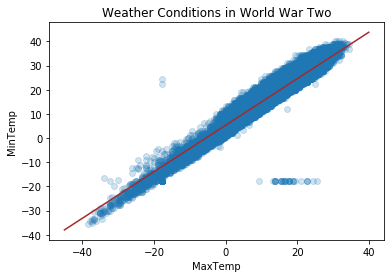

In [156]:
b=regres.intercept_
m=regres.coef_ 
plt.scatter(x,y,alpha=0.2)
plt.plot([-45,40],[b+m*-45,b+m*40],c='brown')
plt.title('Weather Conditions in World War Two')
plt.xlabel('MaxTemp')
plt.ylabel('MinTemp')
plt.show()

# Regresión logistica
---
---

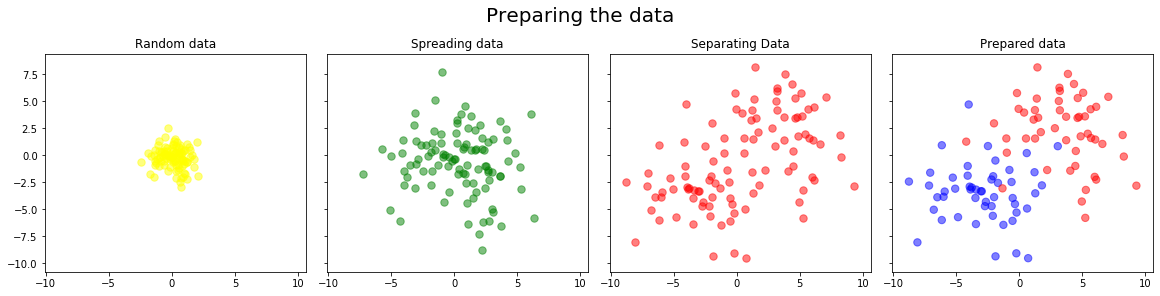

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import statistics as st


n=100
h=n//2
dimen=2


data=np.random.randn(n,dimen)

fig, axs = plt.subplots(1,4,sharey=True,sharex=True, constrained_layout=True)
fig.suptitle('Preparing the data', fontsize=20)
fig.set_size_inches(16, 4)

axs[0].scatter(data[:,0],data[:,1],c='yellow', s=55,alpha=0.5)
axs[0].set_title('Random data')

data=data*3

axs[1].scatter(data[:,0],data[:,1],c='green', s=55,alpha=0.5)
axs[1].set_title('Spreading data')

data[:h,:]=data[:h,:]-3*np.ones((h,dimen))
data[h:,:]=data[h:,:]+3*np.ones((h,dimen))

axs[2].scatter(data[:,0],data[:,1],c='red', s=55,alpha=0.5)
axs[2].set_title('Separating Data')

colors=['blue','red']
color=np.array([colors[0]]*h+[colors[1]]*h).reshape(n)

axs[3].scatter(data[:,0],data[:,1],c=color,s=55,alpha=0.5)
axs[3].set_title('Prepared data')

plt.show()

100%|██████████| 100/100 [00:00<00:00, 1165.93it/s]


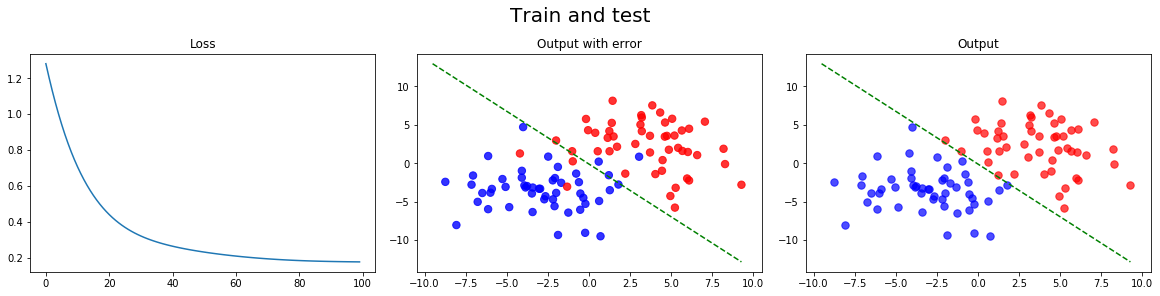

Loss: 0.17620272934436798
Accuracy: 0.94


In [64]:
target=np.array([0]*h+[1]*h).reshape(n,1)
x=torch.from_numpy(data).float().requires_grad_(True)
y=torch.from_numpy(target).float()

model= nn.Sequential(nn.Linear(2,1), nn.Sigmoid())
loss_function= nn.BCELoss()
optimizer=optim.Adam(model.parameters(),lr=0.025)

losses=[]
iterations=100

for i in tqdm(range(iterations)):
    
    result=model(x)
    loss=loss_function(result,y)
 
    losses.append(loss.data)

    optimizer.zero_grad()
        
    loss.backward()
        
    optimizer.step()
      




prediction=model(x)
prediction=['blue' if prediction[i] < 0.5 else 'red' for i in range(len(prediction))]

w = list(model.parameters())

w0 = w[0].data.numpy()

x_axis = np.linspace(torch.min(x).data, torch.max(x).data, len(x))
y_axis = -(w[1].data.numpy() + x_axis*w0[0][0]) / w0[0][1]





fig, axs = plt.subplots(1,3, constrained_layout=True)
fig.suptitle('Train and test', fontsize=20)
fig.set_size_inches(16, 4)

axs[0].plot(range(iterations),losses)
axs[0].set_title('Loss')

axs[1].plot(x_axis, y_axis,'g--')
axs[1].scatter(data[:,0],data[:,1],c=color,s=55,alpha=0.8)
axs[1].set_title('Output with error')

axs[2].plot(x_axis, y_axis,'g--')
for i in range(len(x)):
    axs[2].scatter(x[i,0].data, x[i,1].data,s=55,alpha=0.7,c=prediction[i])
axs[2].set_title('Output')

plt.show()

pred=model(x)
pred=[0 if pred[i] < 0.5 else 1 for i in range(len(pred))]
pred=st.mean([1 if pred[i]==int(y[i]) else 0 for i in range(len(pred))])
print(f'Loss: {float(loss)}')
print(f'Accuracy: {pred}')